In [1]:
import pickle
import os

path_to_directory = 'data/'
files =  os.listdir(path_to_directory)

files = [item for item in files if '.pickle' in item]
files

['info_0_5000.pickle',
 'info_10000_14113.pickle',
 'info_14113_15000.pickle',
 'info_15000_20000.pickle',
 'info_20000_25000.pickle',
 'info_5000_10000.pickle']

In [2]:
data_real = [ ]

for file in files:
    with open('data/' + file, 'rb') as f:
        data_new = pickle.load(f)
        data_real.extend(data_new)

In [3]:
import pandas as pd
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
df.shape

(21285, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21285 entries, 0 to 23851
Data columns (total 36 columns):
Тип жилья             21285 non-null object
Планировка            7618 non-null object
Высота потолков       11457 non-null object
Балкон/лоджия         12327 non-null object
Ремонт                14870 non-null object
Вид из окон           14982 non-null object
Год постройки         14110 non-null object
Тип дома              15314 non-null object
Тип перекрытий        12665 non-null object
Подъезды              13502 non-null object
Лифты                 20810 non-null object
Отопление             12932 non-null object
Аварийность           14257 non-null object
Парковка              10128 non-null object
Мусоропровод          9293 non-null object
Газоснабжение         4595 non-null object
цена                  21285 non-null int64
описание              21285 non-null object
Общая                 21285 non-null object
Жилая                 17391 non-null object
Кухня          

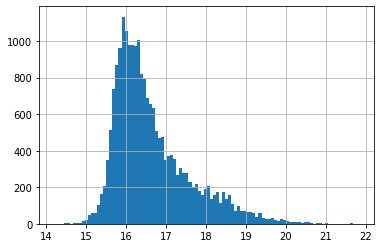

In [6]:
import numpy as np
df['цена'].apply(lambda w: np.log(w)).hist(bins=100);

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [8]:
import pandas as pd
df = pd.DataFrame(data_real)

df = df.drop_duplicates(subset=['href'])
df.reset_index(drop=True, inplace=True)

df.shape

(21285, 36)

C:\Users\DIMA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


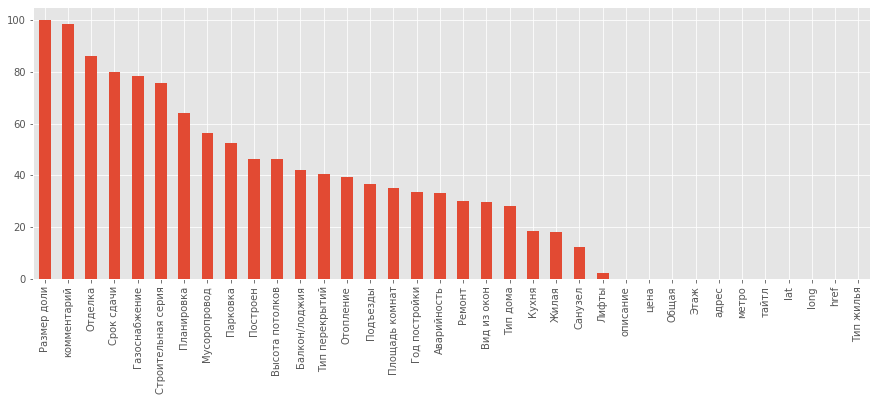

In [9]:
plt.figure(figsize=(15,5))
(100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False).plot('bar');

In [12]:
df[df['цена'] < 100000000]['цена'].mean()

19311085.999246117